# python基础

## 环境安装
Anaconda的安装  
Pycharm的安装  
Jupyter Notebook  

## 什么是机器学习
a computer program is said to learn from experience E with respect to some task T and some performance measure P, if its performance on T, as measured by P, improves with experience E. ---- Tom Mitchel  
机器学习是指用某些算法指导计算机利用已知数据得出适当的模型，并利用此模型对新的情境给出判断的过程。

### 机器学习的分类
- 监督学习（Supervised Learning）
- Unsupervised Learning
<br/>
在机器学习中，这里的每个实体或者每一行被称为一个样本(sample)或数据点，而每一列（用来描述这些实体特征的属性）则被称为特征(feature)。  
如何构建良好的数据特征，这被称为特征提取(feature extraction)或特征工程(feature engineering)。

## Python机器学习
### scikit-learn
python机器学习库：  
https://scikit-learn.org/stable/index.html  
scikit-learn用户指南：  
https://scikit-learn.org/stable/user_guide.html

### 掌握的库
Numpy  
Scipy  
matplotlib  
pandas  
mglearn

## 应用一：鸢尾花分类
构建一个机器学习模型，从已知品种的鸢尾花测量数据中进行学习，从而能够预测新鸢尾花的品种。  
这是一个监督学习问题。这是一个分类问题的示例，可能的输出叫做类别，鸢尾花共有三个类别，这是一个三分类问题。  

### 初识数据
鸢尾花(Iris)数据集，包含在scikit-learn的datasets模块内，可用load_iris调用。

"{}".format

In [5]:
"{} {}".format("hello", "world")    # 不设置指定位置，按默认顺序

'hello world'

In [6]:
"{0} {1}".format("hello", "world")  # 设置指定位置

'hello world'

In [7]:
"{1} {0} {1}".format("hello", "world")  # 设置指定位置

'world hello world'

shape函数  
shape函数是numpy.core.fromnumeric中的函数，它的功能是查看矩阵或者数组的维数

In [9]:
import numpy as np
c = np.array([[1,1],[1,2],[1,3],[1,4]])
c.shape

(4, 2)

导入数据

In [19]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
print("Keys of iris dataset:\n{}".format(iris_dataset.keys()))

Keys of iris dataset:
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [15]:
# 查看各个键的属性
print("Type of data:{}".format(type(iris_dataset['data'])))

Type of data:<class 'numpy.ndarray'>


In [16]:
print("Shape of data:{}".format((iris_dataset['data'].shape)))

Shape of data:(150, 4)


In [17]:
print("Type of target:{}".format(type(iris_dataset['target'])))

Type of target:<class 'numpy.ndarray'>


In [18]:
print("Shape of target:{}".format((iris_dataset['target'].shape)))

Shape of target:(150,)


In [21]:
print("Target:\n{}".format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [22]:
print("Type of frame:{}".format(type(iris_dataset['frame'])))

Type of frame:<class 'NoneType'>


In [23]:
print("Target_names:\n{}".format(iris_dataset['target_names']))

Target_names:
['setosa' 'versicolor' 'virginica']


In [24]:
print("Feature names:\n{}".format(iris_dataset['feature_names']))

Feature names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


我们要用新数据来评估模型的性能。新数据是指模型之前没有见过的数据。通常的做法是将收集好的带标签数据分为两部分，一部分数据用于构建机器学习模型，叫做训练数据或训练集，其余的数据用来评估模型性能，叫做测试数据，测试集或留出集。

scikit-learn中的train-test-split函数可以打乱数据集并进行拆分。这个函数将75%的行数据及对应标签作为训练集，剩下25%的数据及其标签作为测试集。  
random_state参数指定了随机数生成器的种子。

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    iris_dataset['data'],iris_dataset['target'],random_state=0)

print("X_train shape:{}".format(X_train.shape))

X_train shape:(112, 4)


### 观察数据
数据可视化：绘制散点图

### 构建K近邻算法
k近邻算法是一种基本分类和回归方法。  
K近邻算法，即是给定一个训练数据集，对新的输入实例，在训练数据集中找到与该实例最邻近的K个实例，这K个实例的多数属于某个类，就把该输入实例分类到这个类中。（这就类似于现实生活中少数服从多数的思想）根据这个说法，咱们来看下引自维基百科上的一幅图：  
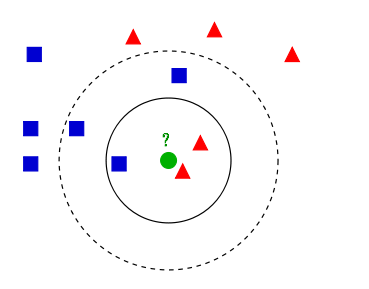
如上图所示，有两类不同的样本数据，分别用蓝色的小正方形和红色的小三角形表示，而图正中间的那个绿色的圆所标示的数据则是待分类的数据。这也就是我们的目的，来了一个新的数据点，我要得到它的类别是什么？好的，下面我们根据k近邻的思想来给绿色圆点进行分类  
- 如果K=3，绿色圆点的最邻近的3个点是2个红色小三角形和1个蓝色小正方形，少数从属于多数，基于统计的方法，判定绿色的这个待分类点属于红色的三角形一类。
- 如果K=5，绿色圆点的最邻近的5个邻居是2个红色三角形和3个蓝色的正方形，还是少数从属于多数，基于统计的方法，判定绿色的这个待分类点属于蓝色的正方形一类。
从上面例子我们可以看出，k近邻的算法思想非常的简单，也非常的容易理解，那么我们是不是就到此结束了，该算法的原理我们也已经懂了，也知道怎么给新来的点如何进行归类，只要找到离它最近的k个实例，哪个类别最多即可。  

哈哈，没有这么简单啦，算法的核心思想确实是这样，但是要想一个算法在实际应用中work，需要注意的不少额~比如k怎么确定的，k为多少效果最好呢？所谓的最近邻又是如何来判断给定呢？

我们提出了k近邻算法，算法的核心思想是，即是给定一个训练数据集，对新的输入实例，在训练数据集中找到与该实例最邻近的K个实例，这K个实例的多数属于某个类，就把该输入实例分类到这个类中。更通俗说一遍算法的过程，来了一个新的输入实例，我们算出该实例与每一个训练点的距离（这里的复杂度为0(n)比较大，所以引出了下文的kd树等结构），然后找到前k个，这k个哪个类别数最多，我们就判断新的输入实例就是哪类！

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

### 做出预测
对花萼长5cm宽2.9cm，花瓣长1cm宽0.2cm进行预测

In [33]:
X_new = np.array([[5,2.9,1,0.2]])
print("Shape of X_new:{}".format(X_new.shape))

prediction = knn.predict(X_new)
print("Prediction:{}".format(prediction))
print("Predicted target name:{}".format(
    iris_dataset['target_names'][prediction]))

Shape of X_new:(1, 4)
Prediction:[0]
Predicted target name:['setosa']


### 评估模型
用测试集评估，将测试数据中的每朵鸢尾花进行预测，并将预测结果与标签（已知的品种）进行对比，我们可以通过计算精度来衡量模型的优劣，精度就是品种预测正确的花所占的比例。  
可以使用np.mean或者knn.score来预测。

In [36]:
y_pred = knn.predict(X_test)
print("Test set predictions:{}".format(y_pred))

print("Test set score: {:.2f}".format(np.mean(y_pred==y_test)))
print("Test set score: {:.2f}".format(knn.score(X_test,y_test)))

Test set predictions:[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
Test set score: 0.97
Test set score: 0.97


对这个模型来说，测试的精度约为0.97